In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.04707873 0.19200922 0.38343104 ... 0.18855113 0.09636875 0.74079147]
 [0.03405367 0.1388869  0.27734891 ... 0.13638554 0.06970685 0.53584003]
 [0.05714733 0.2330737  0.46543437 ... 0.22887604 0.11697887 0.89922247]
 ...
 [0.05577502 0.22747678 0.45425765 ... 0.22337992 0.1141698  0.87762897]
 [0.06014447 0.24529743 0.48984445 ... 0.24087962 0.12311392 0.94638291]
 [0.01978853 0.08070693 0.16116697 ... 0.0792534  0.04050653 0.31137571]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.14694936  0.27889061  0.32699674 ... -0.04936794  0.0800102
   0.66282845]
 [ 0.165351    0.19125687  0.42898802 ... -0.01420059 -0.10082862
   0.83215865]
 [ 0.11763038  0.33050591  0.32642983 ...  0.44297971  0.0543
   0.97918348]
 ...
 [ 0.0424654   0.17609656  0.47166726 ...  0.28330506  0.20000109
   0.6335947 ]
 [-0.01285507  0.4083527   0.39161318 ...  0.2934109   0.01118065
   0.88556792]
 [ 0.06832208  0.25648165  0.04485975 ...  0.05109514  0.1293467
   0.21177756

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                prior_L="point_laplace") 

 

In [5]:
mycebmf.initialize()
print(mycebmf.L[:,1])

print(mycebmf.F[:,1])

tensor([ 0.2338,  0.4781,  0.0914,  0.0341,  0.1091,  0.0727, -0.0523,  0.0909,
        -0.0125, -0.1889,  0.2838,  0.3373, -0.1516, -0.0875, -0.2821,  0.1666,
        -0.1761, -0.2672, -0.0886,  0.1413,  0.0999,  0.0450,  0.0216, -0.2249,
         0.0046,  0.0088, -0.0095, -0.1852, -0.2457, -0.1349,  0.0940, -0.2875,
        -0.0303,  0.0011,  0.3133,  0.1276, -0.0632, -0.0243,  0.0990,  0.0986,
         0.1541,  0.0131,  0.0573,  0.2540, -0.0480, -0.3286,  0.0606, -0.0393,
        -0.1211, -0.0817])
tensor([ 1.7295e-01,  3.3465e-02,  2.3193e-01,  1.5330e-04,  5.3503e-02,
        -2.0925e-01, -9.5059e-03,  3.8512e-01,  2.1953e-01, -2.1693e-01,
         1.9712e-01,  1.0195e-01, -2.6840e-02, -1.0327e-01, -1.9006e-01,
         1.1204e-01,  1.7055e-01, -9.5964e-02, -1.6554e-01,  7.8573e-02,
        -1.2247e-01,  2.9153e-02, -6.9624e-02, -1.0094e-01,  3.6264e-01,
        -1.9306e-01,  1.0462e-01, -2.9459e-01, -7.9000e-02,  1.0480e-02,
         4.3731e-02, -2.2366e-01, -1.0165e-01, -5.6543e

In [6]:
sum(torch.outer(mycebmf.L[:,k], mycebmf.F[:,k]) for k in range(mycebmf.K))

tensor([[ 0.1254,  0.2227,  0.4009,  ...,  0.0973,  0.1210,  0.7063],
        [ 0.1207,  0.1933,  0.4462,  ...,  0.1805, -0.0223,  0.6803],
        [ 0.0907,  0.2610,  0.4803,  ...,  0.2919,  0.0756,  0.9686],
        ...,
        [ 0.0856,  0.2807,  0.4610,  ...,  0.1622,  0.1361,  0.8467],
        [ 0.0423,  0.2494,  0.4767,  ...,  0.2277,  0.1318,  0.8434],
        [ 0.0392,  0.0905,  0.0812,  ...,  0.0810,  0.0732,  0.3437]])

In [7]:
 mycebmf.L @  mycebmf.F.T

tensor([[ 0.1254,  0.2227,  0.4009,  ...,  0.0973,  0.1210,  0.7063],
        [ 0.1207,  0.1933,  0.4462,  ...,  0.1805, -0.0223,  0.6803],
        [ 0.0907,  0.2610,  0.4803,  ...,  0.2919,  0.0756,  0.9686],
        ...,
        [ 0.0856,  0.2807,  0.4610,  ...,  0.1622,  0.1361,  0.8467],
        [ 0.0423,  0.2494,  0.4767,  ...,  0.2277,  0.1318,  0.8434],
        [ 0.0392,  0.0905,  0.0812,  ...,  0.0810,  0.0732,  0.3437]])

In [8]:

k=0
f_o=mycebmf.F[:,k]
l_o=mycebmf.L[:,k]
R= noisy_matrix- mycebmf.L@mycebmf.F.T
Rk= mycebmf._partial_residual_masked(k)

print(Rk)


sum( torch.outer(mycebmf.L[:,k], mycebmf.F[:,k])   for k in range(mycebmf.K))

tensor([[ 0.0796,  0.2576,  0.2948,  ...,  0.0493,  0.0428,  0.6661],
        [ 0.0927,  0.1648,  0.2880,  ..., -0.0325, -0.0091,  0.7393],
        [ 0.1021,  0.3303,  0.3233,  ...,  0.4047,  0.0873,  0.9291],
        ...,
        [ 0.0301,  0.1494,  0.4757,  ...,  0.3683,  0.1697,  0.6820],
        [ 0.0185,  0.4145,  0.3826,  ...,  0.3144, -0.0143,  0.9423],
        [ 0.0561,  0.2597,  0.1351,  ...,  0.0613,  0.0952,  0.1981]])


tensor([[ 0.1254,  0.2227,  0.4009,  ...,  0.0973,  0.1210,  0.7063],
        [ 0.1207,  0.1933,  0.4462,  ...,  0.1805, -0.0223,  0.6803],
        [ 0.0907,  0.2610,  0.4803,  ...,  0.2919,  0.0756,  0.9686],
        ...,
        [ 0.0856,  0.2807,  0.4610,  ...,  0.1622,  0.1361,  0.8467],
        [ 0.0423,  0.2494,  0.4767,  ...,  0.2277,  0.1318,  0.8434],
        [ 0.0392,  0.0905,  0.0812,  ...,  0.0810,  0.0732,  0.3437]])

In [9]:
import torch

k = 0
Y0   = mycebmf.Y0
M    = mycebmf.mask
L    = mycebmf.L
F    = mycebmf.F

# Clone these to avoid view aliasing issues
l_old = L[:, k].clone()
f_old = F[:, k].clone()

# Baseline residual (masked)
recon = L @ F.T
R     = (Y0 - recon) * M

# Partial residual excluding factor k
Rk = (Y0 - (recon - torch.outer(l_old, f_old))) * M

# 1) First identity: Rk = R + l_old f_old^T  (masked)
print(torch.allclose(Rk, R + torch.outer(l_old, f_old) * M, atol=1e-7))

# Mutate L[:,k] --> l_new
L[:, k] = l_old + 1.0
l_new = L[:, k]  # (this is fine; we already saved l_old above)

# New residual (recompute from scratch, masked)
recon_new = L @ F.T
R_new     = (Y0 - recon_new) * M

# 2) Second identity: R_new = Rk - l_new f_old^T  (masked)
print(torch.allclose(R_new, Rk - torch.outer(l_new, f_old) * M, atol=1e-7))


True
True


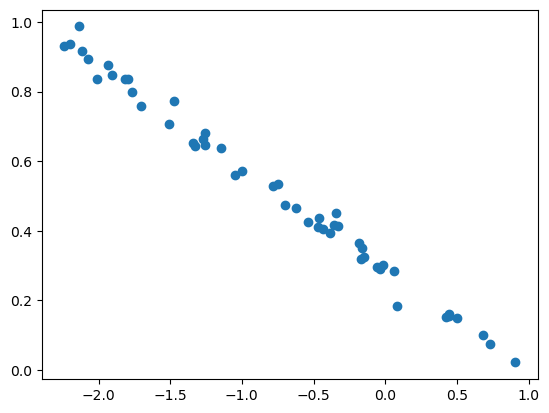

In [10]:
plt.scatter( mycebmf.L[:,0],u)

In [11]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

5


tensor([[0.0879, 0.2043, 0.3783,  ..., 0.1450, 0.1009, 0.7118],
        [0.1036, 0.1710, 0.3925,  ..., 0.1641, 0.0275, 0.6544],
        [0.0796, 0.2603, 0.4802,  ..., 0.2645, 0.0972, 0.9304],
        ...,
        [0.0739, 0.2579, 0.4569,  ..., 0.1955, 0.1128, 0.8744],
        [0.0625, 0.2530, 0.4656,  ..., 0.2412, 0.1137, 0.8823],
        [0.0319, 0.0947, 0.1305,  ..., 0.0886, 0.0484, 0.3316]])

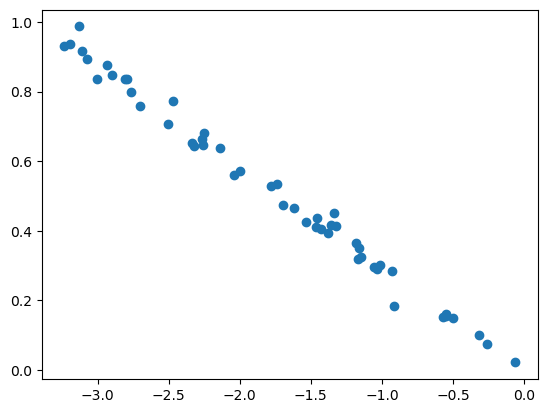

In [12]:
plt.scatter( mycebmf.L[:,0],u)

5


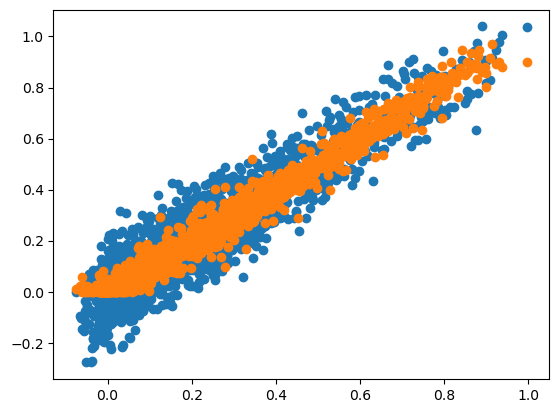

In [13]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [14]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                prior_L="point_laplace") 
mycebmf.initialize()
mycebmf.fit()

5
5
5
4
2


CEBMFResult(L=tensor([[-2.4638],
        [-2.0378],
        [-3.1905],
        [-1.0107],
        [-3.2303],
        [-1.0515],
        [-3.0681],
        [-1.9940],
        [-1.3784],
        [-2.9995],
        [-1.3345],
        [-1.7751],
        [-2.4989],
        [-2.7589],
        [-0.0594],
        [-0.5503],
        [-0.4957],
        [-2.9266],
        [-1.0283],
        [-2.8068],
        [-0.5658],
        [-2.2524],
        [-2.3212],
        [-2.3334],
        [-2.1381],
        [-1.5310],
        [-0.2553],
        [-2.2477],
        [-2.8965],
        [-2.6952],
        [-1.6919],
        [-1.1757],
        [-0.3124],
        [-1.4621],
        [-1.3516],
        [-1.1635],
        [-1.4272],
        [-0.5470],
        [-1.3238],
        [-2.2610],
        [-0.9131],
        [-2.7893],
        [-0.9275],
        [-1.7371],
        [-1.4514],
        [-1.6149],
        [-1.1572],
        [-3.1078],
        [-3.1267],
        [-1.1435]]), F=tensor([[-0.0230],
        [-0.0

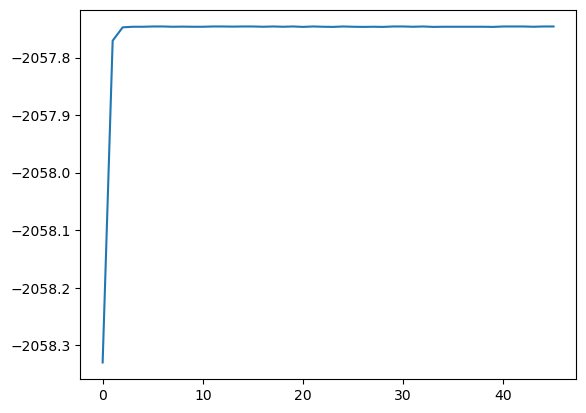

In [15]:
plt.plot(mycebmf.obj)

In [ ]:
results =[]
for i in range(50):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix, prior_F="point_laplace",
                      prior_L="point_laplace") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

SyntaxError: invalid decimal literal (3250926536.py, line 2)

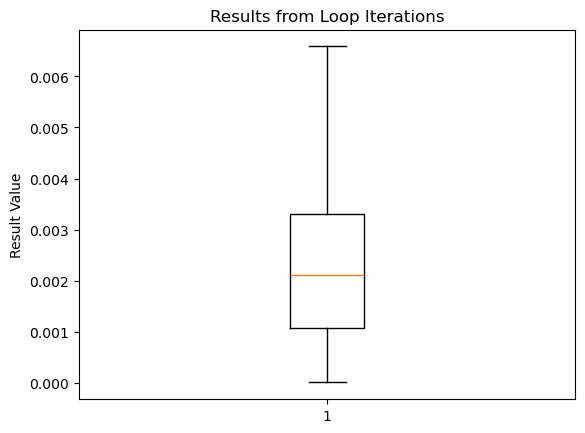

In [ ]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [ ]:
res= np.asarray(results)
np.mean(res )

0.00236293612052501